# Basic Raster Processing and Writing Rasters

# Local analyses on Image

One common task using multispectral imagery is to compute various indices for tasks such as distinguishing between burned and unburned land or measuring nitrogen contained in vegetation.Let’s look at an index used to measure “greenness,” the normalized difference vegetation index (NDVI). The NDVI is a simple index that uses red and near-infrared wavelengths to produce a number that ranges from -1 to 1. Growing plants use red wavelengths for photosynthesis, but reflect near-infrared radiation, so a high ratio of these two measurements can indicate photosynthetic activity and healthy vegetation.


# NDVI from Image

In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
os.chdir('/content/drive/MyDrive/DLP_Data')

# NDVI=NIR-RED/NIR+RED

In [ ]:
ds = gdal.Open('haridwar.tif')

In [ ]:
red_band = ds.GetRasterBand(2)

In [ ]:
nir_band = ds.GetRasterBand(3)

In [ ]:
nir_band.ReadAsArray().dtype

dtype('uint16')

In [ ]:
red = red_band.ReadAsArray()* 1.
nir = nir_band.ReadAsArray()* 1.

In [ ]:
red

array([[39., 37., 38., ..., 53., 53., 52.],
       [39., 38., 38., ..., 53., 54., 53.],
       [38., 37., 36., ..., 55., 55., 52.],
       ...,
       [61., 70., 78., ..., 35., 38., 39.],
       [64., 68., 75., ..., 37., 38., 37.],
       [70., 70., 74., ..., 37., 36., 38.]])

In [ ]:
ndvi = (nir - red) / (nir + red)

In [ ]:
ndvi

array([[0.60406091, 0.61256545, 0.6       , ..., 0.30263158, 0.2885906 ,
        0.2972973 ],
       [0.57837838, 0.5801105 , 0.56818182, ..., 0.27891156, 0.25      ,
        0.25874126],
       [0.57777778, 0.57471264, 0.55555556, ..., 0.30379747, 0.28104575,
        0.29251701],
       ...,
       [0.36125654, 0.3236715 , 0.23529412, ..., 0.38053097, 0.40625   ,
        0.48344371],
       [0.31550802, 0.30612245, 0.25      , ..., 0.33333333, 0.36666667,
        0.45985401],
       [0.26701571, 0.2746114 , 0.24873096, ..., 0.34513274, 0.37931034,
        0.41984733]])

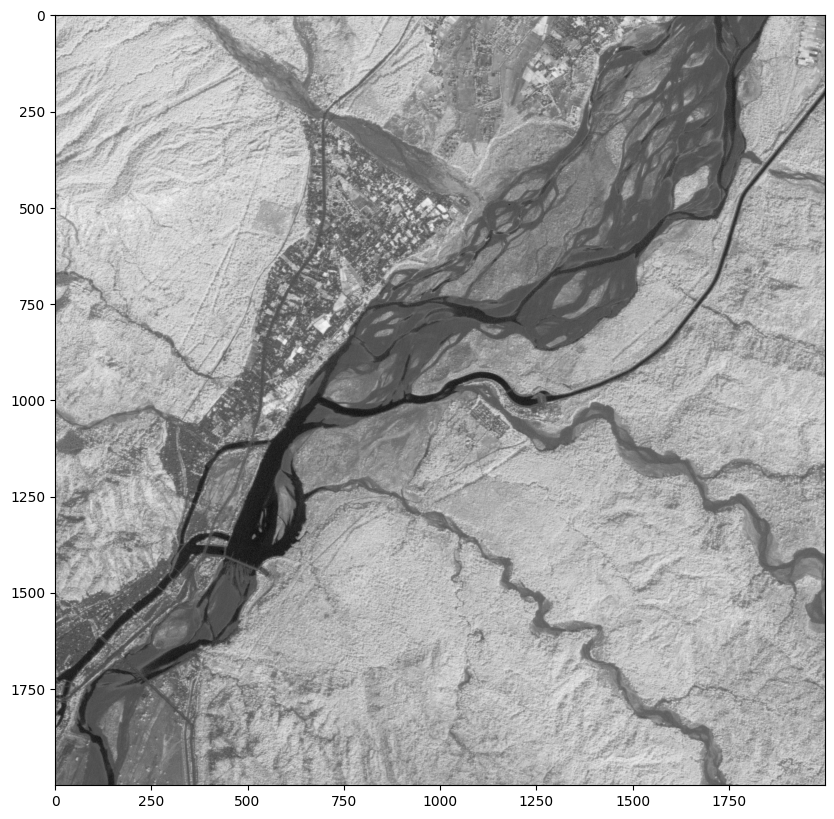

In [ ]:

plt.figure(figsize=(10,10))
plt.imshow(ndvi, cmap='gray')

# NDWI Calculation

# NDWI= GREEN-NIR/GREEN+NIR

In [ ]:
green_band = ds.GetRasterBand(1)
nir_band = ds.GetRasterBand(3)
green = green_band.ReadAsArray() * 1.0
nir = nir_band.ReadAsArray() * 1.0

In [ ]:
ndwi = (green - nir) / (green + nir )

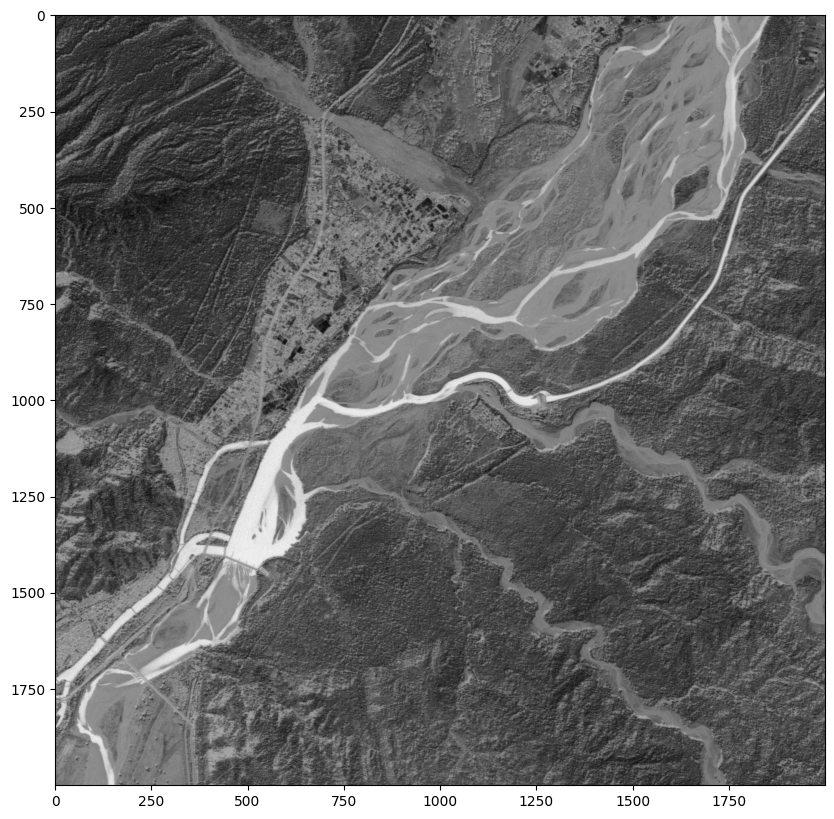

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ndwi,cmap='gray')

In [ ]:
water = np.where(ndwi > 0.08, 255, 0)

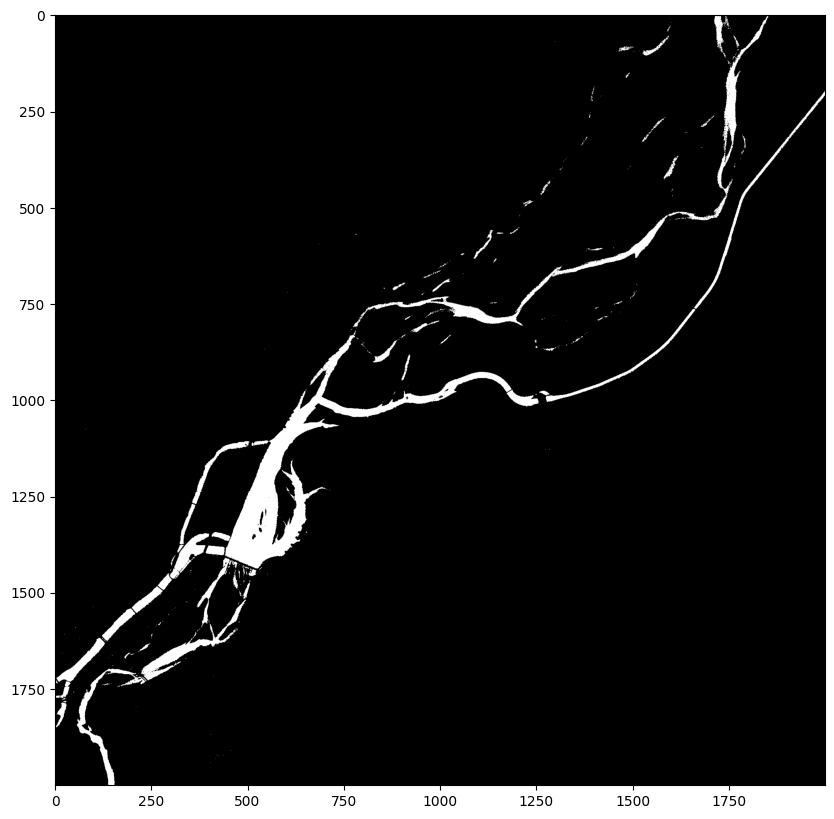

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(water,cmap='gray')

# Writing a Single Band Raster CreateCopy Method

There are two general techniques for creating files, using CreateCopy() and Create().
The CreateCopy method involves calling the CreateCopy() method on the format driver, and passing in a source dataset that should be copied. The Create method involves calling the Create() method on the driver, and then explicitly writing all the metadata, and raster data with separate calls.
https://gdal.org/drivers/raster/index.html

In [ ]:
fileformat = "GTiff"

In [ ]:
driver = gdal.GetDriverByName(fileformat)

In [ ]:
print(driver.ShortName)

GTiff


In [ ]:
print(driver.LongName)

GeoTIFF


In [ ]:
metadata = driver.GetMetadata()

In [ ]:
metadata

{'DCAP_COORDINATE_EPOCH': 'YES',
 'DCAP_CREATE': 'YES',
 'DCAP_CREATECOPY': 'YES',
 'DCAP_OPEN': 'YES',
 'DCAP_RASTER': 'YES',
 'DCAP_VIRTUALIO': 'YES',
 'DMD_CREATIONDATATYPES': 'Byte UInt16 Int16 UInt32 Int32 Float32 Float64 CInt16 CInt32 CFloat32 CFloat64',
 'DMD_CREATIONOPTIONLIST': "<CreationOptionList>   <Option name='COMPRESS' type='string-select'>       <Value>NONE</Value>       <Value>LZW</Value>       <Value>PACKBITS</Value>       <Value>JPEG</Value>       <Value>CCITTRLE</Value>       <Value>CCITTFAX3</Value>       <Value>CCITTFAX4</Value>       <Value>DEFLATE</Value>       <Value>LZMA</Value>       <Value>ZSTD</Value>       <Value>WEBP</Value>   </Option>   <Option name='PREDICTOR' type='int' description='Predictor Type (1=default, 2=horizontal differencing, 3=floating point prediction)'/>   <Option name='DISCARD_LSB' type='string' description='Number of least-significant bits to set to clear as a single value or comma-separated list of values for per-band values'/>   <Opti

# Using CreateCopy()

The `GDALDriver::CreateCopy()` method is fairly simply as most information is collected from the source dataset.

In [ ]:
os.chdir('/content/drive/MyDrive/data')

In [ ]:
src_file='L3-NH44M01-096-050-06Jun14-BAND2.tif'

In [ ]:
dst_filename=r'op_raster1.tif'
src_ds = gdal.Open(src_file)

In [ ]:
dst_ds = driver.CreateCopy(dst_filename, src_ds)

In [ ]:
data=src_ds.ReadAsArray()

In [ ]:
inv_data = np.invert(data)

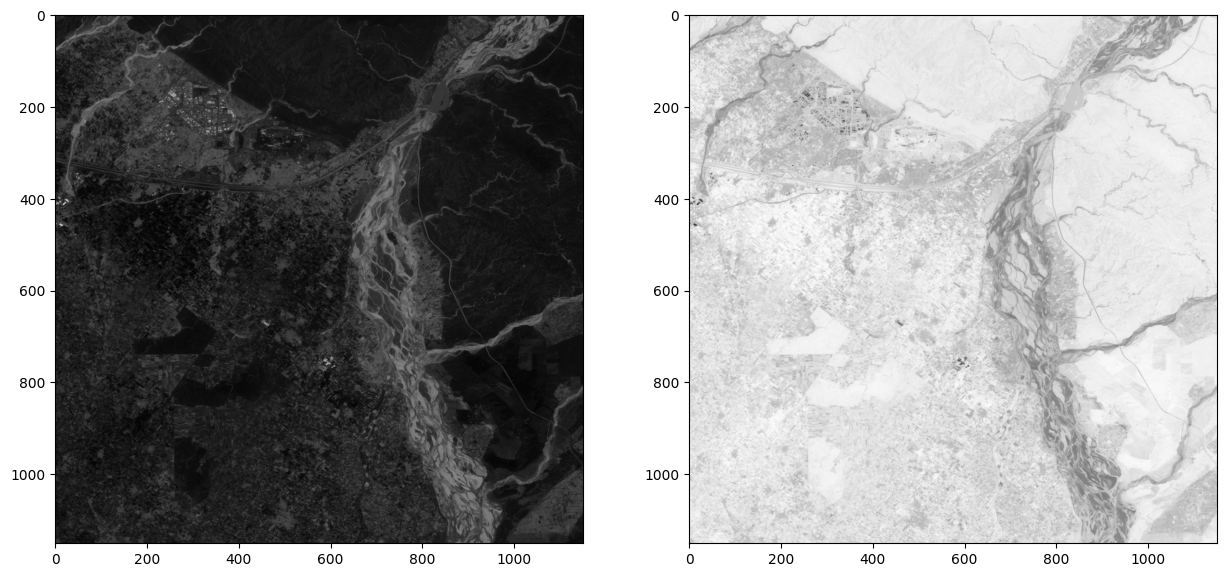

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(data, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(inv_data, cmap='gray')


In [ ]:
out_band=dst_ds.GetRasterBand(1)

In [ ]:
out_band.WriteArray(inv_data)

0

In [ ]:
out_band.FlushCache()

In [ ]:
del dst_ds

# Writing a Single Band Raster Create Method

For situations in which we are not just exporting an existing file to a new file, it is generally necessary to use the `GDALDriver::Create()` method.To  The Create() method  image size, number of bands and band type must be provided explicitly.

<ol>
<li>A csv file containing daily Gridded Rainfall Data Set Over India.
<li> The first data in the record is at 6.5N & 66.5E, the second is at 6.5N & 66.75E, and so on
<li> The second row 6.75N & 66.5E, the second is at 6.75N & 66.75E,
<li> The last data record corresponds to 38.5N & 100.0E
<li>Latitude: 6.5N 38.5N  .25
<li>Longitude: 66.5E  100.0E   .25
<li>Rows and Column: 129x135
   <ol>

In [ ]:
src_txt_file='rainfall.txt'

In [ ]:
dst_filename='rainfall_data.tif'

In [ ]:
driver=gdal.GetDriverByName('GTiff')

In [ ]:
dst_ds = driver.Create(dst_filename,xsize=135,ysize=129,bands=1,
                      eType=gdal.GDT_Float32)

In [ ]:
data = np.loadtxt(src_txt_file,delimiter=',',dtype=np.float32)

In [ ]:
data

array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]], dtype=float32)

In [ ]:
band = dst_ds.GetRasterBand(1)

# Adding Metadata with band

In [ ]:
from datetime import datetime

In [ ]:
band_meta = {'Date of Creation': str(datetime.now()), 'scale_factor':'1'}

In [ ]:
band.SetMetadata(band_meta)

0

#  Adding NoData with band

In [ ]:
band.SetNoDataValue(-999.0)

0

# Adding Metadata to dataset

In [ ]:
ds_meta = {'Date of Creation': str(datetime.now()), 'organisation':'1', 'Processng Level':'L3'}

In [ ]:
dst_ds.SetMetadata(ds_meta)

0

In [ ]:
band.WriteArray(data)

0

In [ ]:
dst_ds.FlushCache()
dst_ds=None

In [ ]:
rf = gdal.Open('rainfall_data.tif')

In [ ]:
rf.GetRasterBand(1).GetNoDataValue()

-999.0

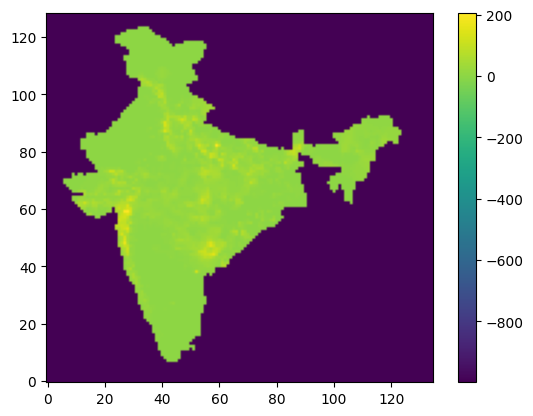

In [ ]:
plt.imshow(rf.ReadAsArray(), origin='lower')
plt.colorbar()

In [ ]:
rf.GetProjectionRef()

''

# Writing a Georefenced Raster

In [ ]:
from osgeo import osr

In [ ]:
crs=osr.SpatialReference()
crs.SetWellKnownGeogCS('WGS84')
crs.ExportToWkt()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [ ]:
trf=[66.5, .25, 0.0, 6.5 , 0.0, .25]

In [ ]:
src_txt_file='rainfall.txt'
dst_filename='rainfall_data.img'

In [ ]:
driver=gdal.GetDriverByName('HFA')

In [ ]:
dst_ds = driver.Create(dst_filename,xsize=135,ysize=129,bands=1,
                      eType=gdal.GDT_Int16)

In [ ]:
dst_ds.SetProjection(crs.ExportToWkt())

0

In [ ]:
dst_ds.SetGeoTransform(trf)

0

In [ ]:
band=dst_ds.GetRasterBand(1)

In [ ]:
band.SetNoDataValue(-999.0)

0

In [ ]:
data=np.loadtxt(src_txt_file,delimiter=',',dtype=np.float32)

In [ ]:
band.WriteArray(data)

0

In [ ]:
dst_ds.FlushCache()
dst_ds=None

# Read and Confirm

In [ ]:
import numpy.ma as ma

In [ ]:
ds = gdal.Open('rainfall_data.img')

In [ ]:
band = ds.GetRasterBand(1)

In [ ]:
no_data = band.GetNoDataValue()

In [ ]:
data = ds.ReadAsArray()

In [ ]:
data = ma.masked_equal(data, no_data)

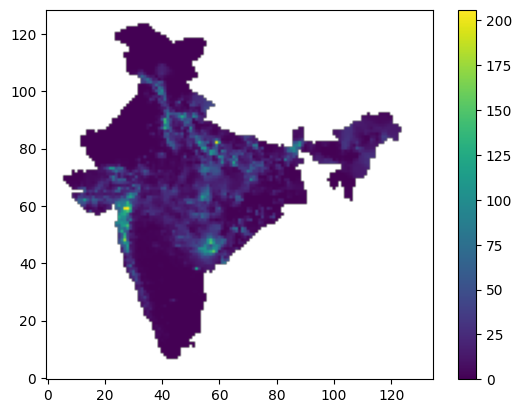

In [ ]:
plt.imshow(data, origin='lower')
plt.colorbar()

In [ ]:
ds.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [ ]:
ds.GetGeoTransform()

(66.5, 0.25, 0.0, 6.5, 0.0, 0.25)

In [ ]:
ds.GetMetadata()

{}

In [ ]:
rainfall = ds.GetRasterBand(1)

In [ ]:
rainfall.GetNoDataValue()

-999.0

In [ ]:
rainfall.GetMetadata()

{'LAYER_TYPE': 'athematic'}

# Stacking Individual Raster Bands

In [ ]:
red_file = 'L3-NH44M01-096-050-06Jun14-BAND3.tif'
green_file = 'L3-NH44M01-096-050-06Jun14-BAND2.tif'
nir_file = 'L3-NH44M01-096-050-06Jun14-BAND4.tif'

In [ ]:
red_ds = gdal.Open(red_file)
green_ds = gdal.Open(green_file)
nir_ds = gdal.Open(nir_file)

In [ ]:
projection = red_ds.GetProjectionRef()

In [ ]:
geo_trf = red_ds.GetGeoTransform()

In [ ]:
red_data = red_ds.ReadAsArray()
green_data = green_ds.ReadAsArray()
nir_data = nir_ds.ReadAsArray()

In [ ]:
driver = gdal.GetDriverByName('HFA')

In [ ]:
dst_ds = driver.Create('stacked_image.img', xsize=red_ds.RasterXSize,
                       ysize=red_ds.RasterYSize, bands=3, eType=gdal.GDT_Int16)

In [ ]:
dst_ds.SetProjection(projection)

0

In [ ]:
dst_ds.SetGeoTransform(geo_trf)

0

In [ ]:
red_band = dst_ds.GetRasterBand(1)
red_band.WriteArray(nir_data)
red_band.SetColorInterpretation(gdal.GCI_RedBand)

0

In [ ]:
green_band = dst_ds.GetRasterBand(2)
green_band.WriteArray(red_data)
green_band.SetColorInterpretation(gdal.GCI_GreenBand)

0

In [ ]:
blue_band = dst_ds.GetRasterBand(3)
blue_band.WriteArray(green_data)
blue_band.SetColorInterpretation(gdal.GCI_BlueBand)

0

In [ ]:
dst_ds.FlushCache()

In [ ]:
del dst_ds

# Read And Confirm

In [ ]:
ds = gdal.Open('stacked_image.img')

In [ ]:
ds.RasterCount

3

In [ ]:
data = ds.ReadAsArray(band_list=[1,2,3])

In [ ]:
data = np.transpose(data, (1,2,0))

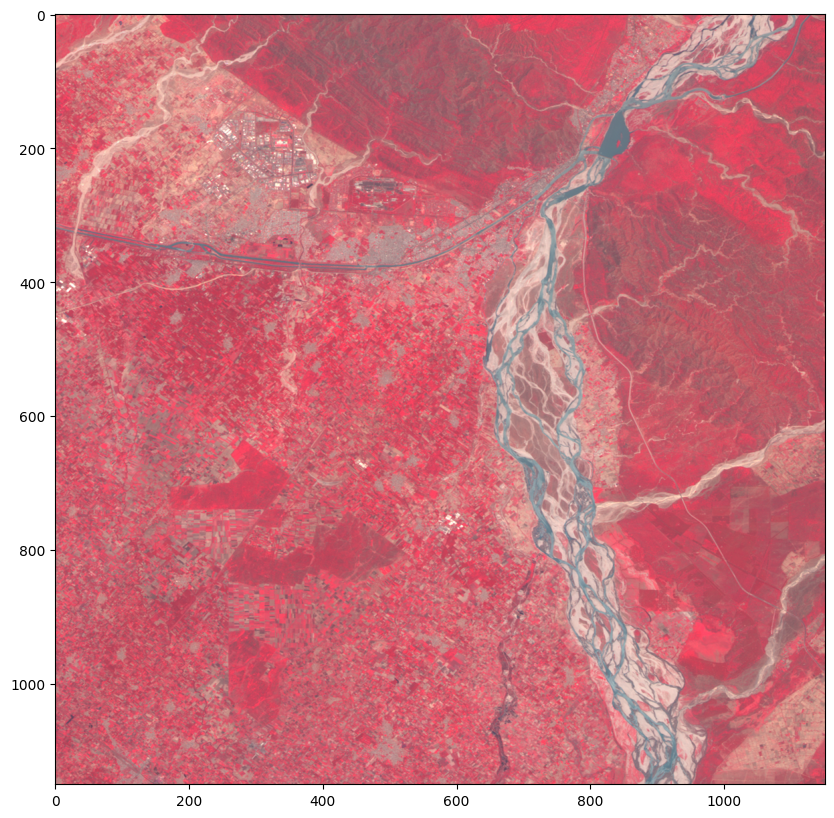

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(data)

In [ ]:
plt.close()

# Thank You